<a href="https://colab.research.google.com/github/Nancyp1997/ComputerVisionProjects/blob/master/VGG16ScratchImplementations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**VGG16 architecture implementation from scratch**

![alt text](https://qph.fs.quoracdn.net/main-qimg-e657c195fc2696c7d5fc0b1e3682fde6)

![alt text](https://www.researchgate.net/profile/Max_Ferguson/publication/322512435/figure/fig3/AS:697390994567179@1543282378794/Fig-A1-The-standard-VGG-16-network-architecture-as-proposed-in-32-Note-that-only.png)

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Conv2D,Dense,Flatten
from keras.layers import MaxPooling2D
from keras.utils import plot_model

Using TensorFlow backend.


In [2]:
#Input should be an image of 224 X 224 X 3
inputimage = Input(shape=(224,224,3))
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding='same',activation='relu'))
#model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
def vgg_block(iternum,n_filters,model):
  for _ in range(iternum):
    model.add(Conv2D(filters=n_filters,kernel_size=(3,3),strides=1,padding='same',activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
  return model

model=vgg_block(1,64,model)
model=vgg_block(2,128,model)
model=vgg_block(3,256,model)
model=vgg_block(3,512,model)
model=vgg_block(3,512,model)
#Flatten the input
model.add(Flatten())
#Adding fully connected layers
model.add(Dense(units=4096,activation='relu'))
model.add(Dense(units=4096,activation='relu'))
model.add(Dense(units=2,activation='softmax'))

from keras.optimizers import Adam
optimizer=Adam(lr=0.001)
model.compile(optimizer=optimizer,loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)      

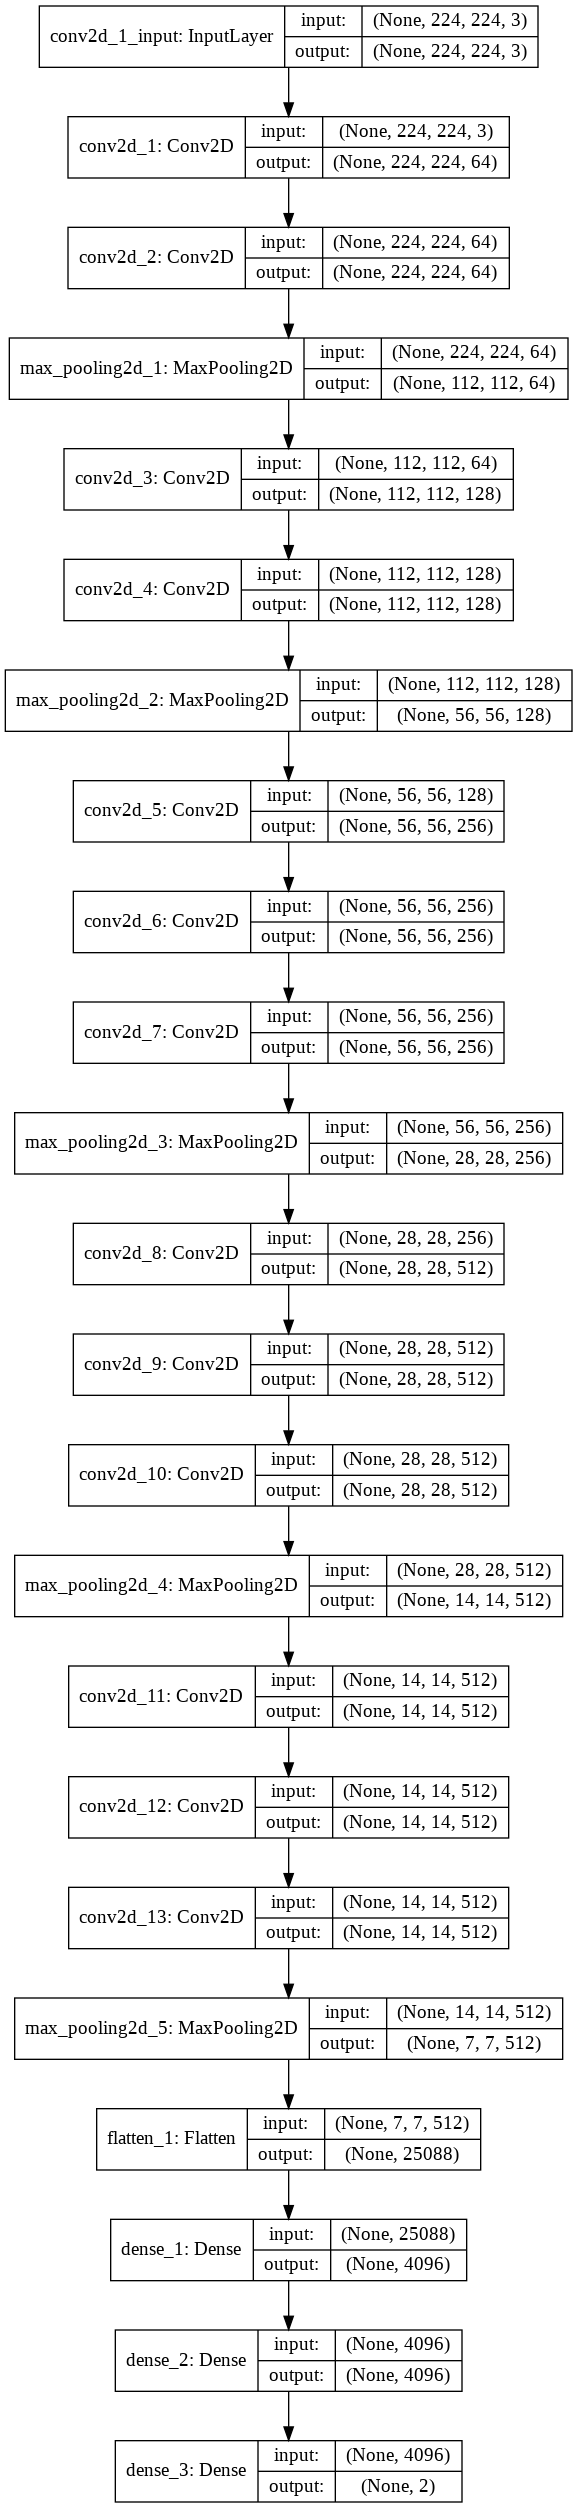

In [3]:
plot_model(model,show_shapes=True,to_file='vgg16architecture.png')

**Testing on image**

In [4]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O cats_and_dogs_filtered.zip

--2020-08-01 12:00:57--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  76.2MB/s    in 0.9s    

2020-08-01 12:00:58 (76.2 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [5]:
! unzip cats_and_dogs_filtered.zip


Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

In [15]:
from keras.preprocessing.image import ImageDataGenerator
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="cats_and_dogs_filtered/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="cats_and_dogs_filtered/validation", target_size=(224,224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
model.save('vgg16_1.h5')

In [17]:
hist = model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, validation_steps=10,epochs=20,callbacks=[checkpoint,early])

Epoch 1/20
100/100 [==============================] - 27s 266ms/step - loss: 0.6932 - accuracy: 0.4871 - val_loss: 0.6932 - val_accuracy: 0.4875
Epoch 2/20


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


100/100 [==============================] - 26s 262ms/step - loss: 0.6932 - accuracy: 0.4732 - val_loss: 0.6931 - val_accuracy: 0.5188
Epoch 3/20
100/100 [==============================] - 26s 263ms/step - loss: 0.6932 - accuracy: 0.4727 - val_loss: 0.6931 - val_accuracy: 0.5094
Epoch 4/20
100/100 [==============================] - 27s 266ms/step - loss: 0.6932 - accuracy: 0.4968 - val_loss: 0.6930 - val_accuracy: 0.5034
Epoch 5/20
100/100 [==============================] - 26s 264ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6932 - val_accuracy: 0.4812
Epoch 6/20
100/100 [==============================] - 26s 263ms/step - loss: 0.6933 - accuracy: 0.4908 - val_loss: 0.6933 - val_accuracy: 0.4875
Epoch 7/20
100/100 [==============================] - 27s 266ms/step - loss: 0.6932 - accuracy: 0.5050 - val_loss: 0.6930 - val_accuracy: 0.5101
Epoch 8/20
100/100 [==============================] - 26s 263ms/step - loss: 0.6932 - accuracy: 0.4962 - val_loss: 0.6937 - val_accuracy: 0.4

In [22]:
from keras.preprocessing import image
img = image.load_img('doggie.jpg',target_size=(224,224))

Dog


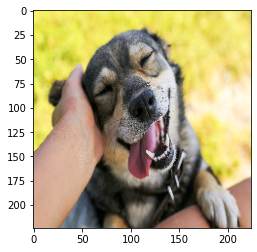

In [23]:
import numpy as np
import matplotlib.pyplot as plt

img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("Cat")
else:
    print('Dog')